# SI 618: Data Manipulation and Analysis
## 02 - Introduction to pandas
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Sort a DataFrame by index or column
* Group data and calculate aggregate statistics
* Make basic plots (scatter plot, histogram, bar chart, etc)

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas before you leave the classroom. Try to get through as much as you can.

## Points
Questions 1-12 are worth 1 point each; Questions 13-24 are worth 2 points each.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [2]:
MY_UNIQNAME = 'Elenore'

In [3]:
%whos

Variable      Type    Data/Info
-------------------------------
MY_UNIQNAME   str     Elenore


## NumPy

Let's set up a couple of plain old python lists

In [4]:
names = ['Alphonso','Beata','Cal','Din','Ella']
scores = [3,5,4,4,5]  

### <font color="magenta">Q1: Write code to iterate through the two lists to produce the following output:</font>
```
Alphonso has a score of 3.
Beata has a score of 5.
Cal has a score of 4.
Din has a score of 4.
Ella has a score of 5.
```

Share your code to the slack channel "#general".

In [5]:
# insert your code here
def name_score(name, score):
    for i in range(0,5):
        print(name[i],' has a score of ', score[i])

name_score(names, scores)

# for name,score in zip(names,scores):
#     print(f'(name) has a score of (score).')
      

Alphonso  has a score of  3
Beata  has a score of  5
Cal  has a score of  4
Din  has a score of  4
Ella  has a score of  5


## NumPy

In [6]:
import numpy as np

In [7]:
ar_names = np.array(names)
ar_names
# '<U8' means the longest word has 8 letter length

array(['Alphonso', 'Beata', 'Cal', 'Din', 'Ella'], dtype='<U8')

### <font color="magenta">Q1: Create ```ar_scores``` that contains an array of the scores from above:

In [8]:
ar_scores = np.array(scores) # np.nan is a "placeholder"; replace np.nan with your code

In [9]:
ar_scores

array([3, 5, 4, 4, 5])

Now, let's say we wanted to modify the scores by multiplying each one by 1.25.

### <font color="magenta">Q2: Write some code that would do that using plain old python:</font>

In [10]:
# insert your code here
scaled_scores = []
for score in scores:
    scaled_scores.append(score*1.25)
scaled_scores

[3.75, 6.25, 5.0, 5.0, 6.25]

(slides)

## ufuncs

We can use ufuncs to multiply each score by 1.25:

In [11]:
modified_scores = ar_scores * 1.25
modified_scores

array([3.75, 6.25, 5.  , 5.  , 6.25])

### <font color="magenta">Q3: write code to create a new array called sqrt_scores that contains the square roots of each of the original scores</font>

In [12]:
# insert your code here
sqrt_scores=np.sqrt(scores) # also work if I type np.sqrt(ar_scores)
sqrt_scores

array([1.73205081, 2.23606798, 2.        , 2.        , 2.23606798])

(slides)

In [13]:
sqrt_scores=ar_scores**0.5
sqrt_scores

array([1.73205081, 2.23606798, 2.        , 2.        , 2.23606798])

## pd.Series

In [14]:
import pandas as pd

In [15]:
s_names = pd.Series(names)

In [16]:
s_names

0    Alphonso
1       Beata
2         Cal
3         Din
4        Ella
dtype: object

In [17]:
s_scores = pd.Series(scores)
s_scores

0    3
1    5
2    4
3    4
4    5
dtype: int64

In [18]:
names # just to remind ourselves what names looks like

['Alphonso', 'Beata', 'Cal', 'Din', 'Ella']

In [19]:
s_scores = pd.Series(scores,index=names)
s_scores

Alphonso    3
Beata       5
Cal         4
Din         4
Ella        5
dtype: int64

(slides)

## pd.DataFrame

In [20]:
df = pd.DataFrame({"name":names,"score":scores})

In [21]:
df

,name,score
0,Alphonso,3
1,Beata,5
2,Cal,4
3,Din,4
4,Ella,5


In [22]:
specializations = ['DS','UX','UX','DS','DS']

In [23]:
df['specialization'] = specializations
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


Let's say we wanted to set the "name" column to be the index:

In [24]:
df.set_index("name") # set_index will return a new dataframe, not changing df its original dataframe

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [25]:
df.set_index("name",inplace = True) # equivalent to df = df.set_index("name")

In [26]:
df # with inplace attribute, df dataframe changed

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [27]:
df.reset_index(inplace = True)
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


In [28]:
sData

NameError: name 'sData' is not defined

So Series are a bit friendlier than numpy arrays, but they're still only one-dimensional.  Keep in mind that our basic data abstraction is a table, which can
be thought of as a two-dimensional array.  Let's go ahead and create a simple DataFrame with just one column:

Let's return to the code we ran last time and walk though it just to make sure we understand it

In [ ]:
df_names = pd.read_csv('data/names.csv')

Actually, that CSV file was created from a number of smaller CSV files.  Here's
the code that will load the set of smaller CSV files:

In [ ]:
years = range(1880, 2015)
pieces = []
for year in years:
    path = 'data/names/yob%d.csv' % year
    frame = pd.read_csv(path)
    frame['year'] = year
    pieces.append(frame)
df_names = pd.concat(pieces, ignore_index=True)

In [ ]:
df_names.head()

Let's discuss what just happened there.

# Part 1 (as a group): Mental Health Disorders In the Tech Workplace
From https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?

**phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?

**mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments



Let's load the usual libraries and also ask for plots to be rendered inside the notebook:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

Then read the CSV file into a DataFrame:

In [ ]:
df = pd.read_csv("data/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [ ]:
df.head() # by default, first 5 rows, can modify the code like df.head(number), or df.sample(5) to check random samples.

If you want to look at a random sample, you can use .sample()

In [ ]:
df.sample(5)

Finally, you can get some basic information about the size and shape of the DataFrame:

In [ ]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

You can list the columns:


In [ ]:
df.columns

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [ ]:
df.shape[0]

In [ ]:
df.shape[1]

In [ ]:
print(df['Country'])

In [ ]:
country_state = df[['Country','state']    ]
country_state.head()

## Extracting rows

In [ ]:
df.iloc[0]

In [ ]:
df.loc[0]

In [ ]:
df_gender = df.set_index('Gender')

In [ ]:
df_gender.head(3)

In [ ]:
df_gender.loc['Male']


In [ ]:
df.iloc['Gender'] # generates error

In [ ]:
df.iloc[0] # iloc must take integer, loc can take anything

## Sorting
You can use either sort_values() or sort_index():


In [ ]:
df_sorted = df.sort_values('Age')
df_sorted.tail(10) # df_sorted.head() and df_sorted.tail().

## Filtering using Boolean Masking

In [ ]:
df.Age # equal to df('Age')

In [ ]:
df['Age'] > 0

In [ ]:
df[df['Age'] > 0] # bullean masking, kinda like filter function

In [ ]:
df['Age'] > 40

In [ ]:
df[  df['Age'] > 40  ]

### Example: Find people who reported a family history of mental health conditions. </font>

Solution:

In [ ]:
family_history_mask = df.family_history=='Yes'
df[family_history_mask].tail(5)

You can use a simple expression like ```df[df['family_history'] == 'Yes']``` or you can make more complex boolean expressions using parentheses: 


In [ ]:
df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
df_filtered.head()

### <font color="magenta">Q4: How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [ ]:
# insert code here
df_supervisor=df[(df['supervisor']!='No') | (df['coworkers']!='No')]
#df_supervisor.head()
print(len(df_supervisor))
print(df_supervisor.shape[0])

### <font color="magenta">Q5: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996). Make appropriate assumptions when constructing your filter. </font>

In [ ]:
# insert code here
df_millenials=df[(df['Age']<=39) & (df['Age']>=19)]
df_millenials

**NOTE: We will still use df for the following analysis**

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [ ]:
df['Age'].mean()

### Does that look right?  What should we do?

### <font color="magenta">Q6: What is the _median_ age of the survey sample?  </font>

In [ ]:
# insert code here
df['Age'].median()

### <font color="magenta">Q7: Write one line of code to compute basic statistics (mean, standard deviation, min, 25% percentile, etc) about Age  </font>

Hint: see the readings

In [ ]:
# insert code here
df.describe() # equal to df['Age'].describe, it's because only Age column is numeric values,by default
#df.describe(include='all') if you want to apply it to all kinds of values

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [ ]:
df.coworkers.unique()

In [ ]:
df.Gender.unique()

Example: Write one line of code to count the occurrences of the countries and show the top 5 countries.  </font>

Solution:

In [ ]:
df.Country.value_counts().head(10) #top 5, but Ireland and Netherlands are tie, so should check more to make sure including the tie ones

Are you sure that's correct?

### <font color="magenta">Q8: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [ ]:
# insert code here
df.no_employees.value_counts(ascending=True)


### <font color="magenta">Q9: How many Michiganders aged between 20 and 30 sought treatment for a mental health condition? How many did not? </font>
Show your code and also include a markdown block with a complete sentence or two that answers these questions.

In [ ]:
# insert code here
df_of_interest=df[(df.Age>=20) & (df.Age<=30) & (df.state=='MI')]
df_of_interest.treatment.value_counts()

Replace this with you answer

### <font color="magenta">Q10: Among the people from United States, how many repondents were there from each state?  </font>

In [ ]:
# insert code here
# df.state.value_counts()
df[df.Country =='United States'].state.value_counts()

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

In [ ]:
df.benefits.value_counts()

In [ ]:
df.benefits.value_counts(normalize=True)

In [ ]:
df.benefits.value_counts(normalize=True).plot.bar()

Example: Create a histogram of the distribution of Age values:

In [ ]:
df.Age.value_counts().sort_index().plot.bar()

### <font color="magenta">Q11: Experiment with the number of bins in the histogram of the Age distribution.  Is there a "best" value?</font>

Hint: use the bins= option to plot()

In [ ]:
# insert your code here
df.Age.value_counts().plot.hist(bins=20)

## Aggregation

Example: Find the size of each Age group.

Solution:

In [ ]:
df.columns

### <font color="magenta">Q12: Find the median age of each state. </font>

In [85]:
# insert code here
df.groupby('state').median()
df.groupby('state').describe()

KeyError: 'state'

# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

## Time to load some data:

In [29]:
titles = pd.read_csv('data/titles.csv', index_col=None)

The titles DataFrame contains a list of movie titles and release year

In [30]:
cast = pd.read_csv('data/cast.zip', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [31]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [32]:
cast.sample(5)

,title,year,name,type,character,n
713739,Fragile World,2014,Jake Flaming,actor,Restaurant Patron,NaN
1326852,Csinibaba,1997,Andr?s Lovasi,actor,Singer,26.0
635477,Emir,2010,Owazar Salah Edone,actor,Invading Soldier,100.0
3520853,Auto Focus,2002,Cassie Townsend,actress,Elaine,26.0
2613908,Teachers,1984,Virginia Capers,actress,Landlady,20.0


### <font color="magenta">Q13: How many entries are there in the cast table?</font>

In [33]:
len(cast)

3634467

### <font color="magenta">Q14: How many entries are there in the titles table?</font>

In [34]:
len(titles)

232330

### <font color="magenta">Q15: What are the two earliest movies?</font>

In [35]:
titles.sort_values('year').head()

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898
124505,Reproduction of the Corbett and Jeffries Fight,1899
20657,"Pierrot's Problem, or How to Make a Fat Wife O...",1900
13599,Family Troubles (II),1900


### <font color="magenta">Q16: How many movies have the title "Hamlet"?</font>

In [37]:
len(titles[titles.title=='Hamlet'])


18

### <font color="magenta">Q17: List all of the "Treasure Island" movies from earliest to most recent.</font>

In [38]:
treasure_island_mask=titles.title =='Treasure Island'
treasure_island_df=titles[treasure_island_mask]
treasure_island_df.head()
treasure_island_df.sort_values('year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


In [39]:
len(treasure_island_df.sort_values('year'))

8

### <font color="magenta">Q18: List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.</font>

In [62]:
c = cast.copy()
c.sample(3)

,title,year,name,type,character,n
2756538,The Deception,2012,Amber LeRae Earls,actress,Henrietta - Race Clerk,NaN
3061720,Eorin wangja,2008,Yeong-ih Lee,actress,Superintendent Catholic sister,NaN
1743930,Steve Jobs,2015,Pablo Picasso,actor,Himself,NaN


In [63]:
c=c[c.name=='Cary Grant']
c.head()

,title,year,name,type,character,n
845476,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0
845477,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
845478,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
845479,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
845480,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0


In [66]:
c=c[c.year//10==194]
c.head()

,title,year,name,type,character,n
845478,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
845486,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
845490,Every Girl Should Be Married,1948,Cary Grant,actor,Dr. Madison Brown,1.0
845493,George White's Scandals,1945,Cary Grant,actor,Cary Grant,NaN
845495,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0


In [71]:
c=c[c.n==2]
c.sort_values('year')

,title,year,name,type,character,n
845513,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
845523,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### <font color="magenta">Q19: What are the ten most common movie names of all time?</font>

In [73]:
titles.title.value_counts().head(15)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Temptation              11
Kismet                  11
Freedom                 11
Othello                 11
The Three Musketeers    11
Anna                    10
Hero                    10
Vengeance               10
Anna Karenina           10
She                     10
Name: title, dtype: int64

### <font color="magenta">Q20: Plot the number of "Hamlet" films made each decade</font>

Make sure your decades are in chronological order on the x-axis

In [74]:
t=titles.copy()
t=t[t.title=="Hamlet"]

In [75]:
t.head()

,title,year
6009,Hamlet,1948
45350,Hamlet,1990
46721,Hamlet,1910
92146,Hamlet,1976
94355,Hamlet,1987


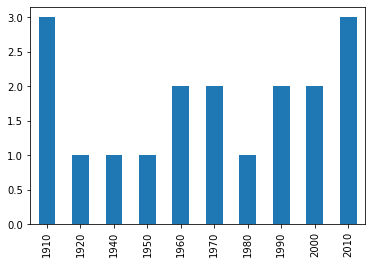

In [77]:
(t.year//10*10).value_counts().sort_index().plot(kind='bar')

### <font color="magenta">Q21: Who are the 10 people most often credited as "Herself" in film history?</font>

In [80]:
c=cast.copy()
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      8
Mary Jo Pehl           7
Hillary Clinton        7
Joan Rivers            6
Sumie Sakai            6
Caroline Rhea          5
Marilyn Monroe         5
Bunny Yeager           5
Name: name, dtype: int64

### <font color="magenta">Q22: What are the 10 most frequent roles that start with the word "Science"?</font>
Hint: read docs on str.startswith()

In [81]:
c=cast.copy()
c=c[c.character.str.startswith("Science")]
c.character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Promo Cadet      5
Name: character, dtype: int64

### <font color="magenta">Q23: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?  How many supporting (n=2) roles were available to actors,and how many to actresses, in the 1950s?</font>

In [82]:
c=cast.copy()

In [ ]:
c=c[c.year//10==195]

In [ ]:
c.head()

In [83]:
c=c[c.n==1]
c.type.value_counts()

actor      102199
actress     45614
Name: type, dtype: int64

In [84]:
c=cast.copy()
c=c[c.year//10==195]
c=c[c.n==2]
c.type.value_counts()

actor      4564
actress    4556
Name: type, dtype: int64

### <font color="magenta">Q24: Comment on the differences in gender ratios for leading vs. supporting roles in the 1950s.  Does there appear to be a bias?</font>

Insert your response here.